# Basic image loading

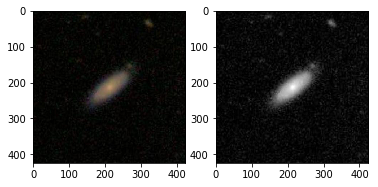

(424, 424)


In [2]:
#Load and show an image with Pillow
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

#Load the image
img = imread('./galaxy_zoo_images/images_training_rev1/112017.jpg')

fig, ax = plt.subplots(1,2)
# Full colour
ax[0].imshow(img)

# Grayscale
grayImg = rgb2gray(img)
ax[1].imshow(grayImg, cmap = "binary_r")
plt.show()

print(grayImg.shape)

# Get list of image names

In [ ]:
from os import listdir
from os.path import isfile, join
path = "./galaxy_zoo_images/images_training_rev1"

imageNames = [f for f in listdir(path) if isfile(join(path, f))]

# Load all images into some number of 'chunks'

In [ ]:
chunks = 5 #Increase this if you get a memory error

for i in range(chunks):
    print("Chunk {}/{}:".format(i, chunks))  
    
    imgsInChunk = len(imageNames)//chunks
    
    # if last set add on a few to account for impefect division
    if i==chunks-1:
        imgsInChunk += len(imageNames)%chunks

    tmpStore = np.zeros((424, 424, imgsInChunk))
    for j in range(imgsInChunk): 
        fileName = path + "/" + imageNames[i*imgsInChunk + j]
        img = imread(fileName)
        grayImg = rgb2gray(img)
        tmpStore[:,:,j] = grayImg
        print(i*imgsInChunk + j,"of", imgsInChunk, "complete","\t"*10, end = '\r')
    np.save("images/images{}.npy".format(i), tmpStore)
        